PHYS 850 2022W, Assignment 3
============================
Add _Lastname_First name to file name and return as .ipynb and as .pdf to instructor

Lastname: Bagchi
---
First name: Mayukh
---
Grade:
---

* All code must be commented
* Figures must have titles, including on axes etc.
* Reply to each question in a new cell beneath it.  Each cell must run independently of the others.

Question 1.1 (/10)
===
Generate $n=1000$ iid rvs from an exponential distribution of scale $\tau=2$.  For a flat prior, carry out a Bayesian analysis, plotting prior, likelihood, and posterior.  Determine the most credible value, and determine the 68.27% HPD credible interval.  Comment.

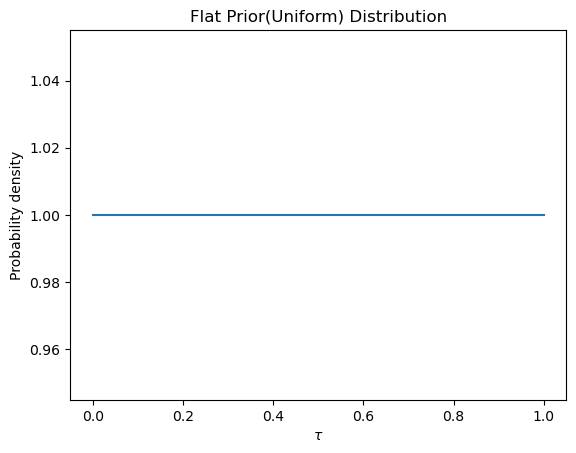

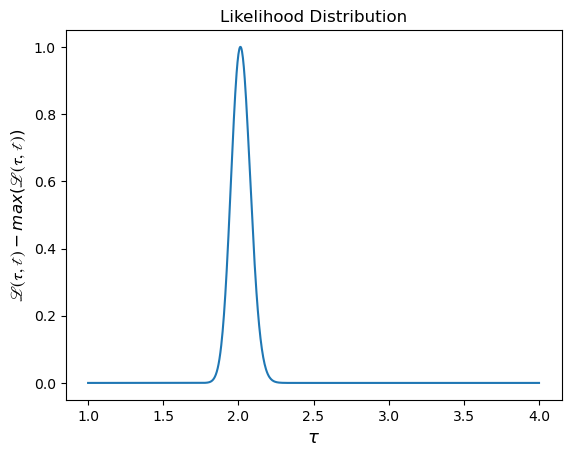

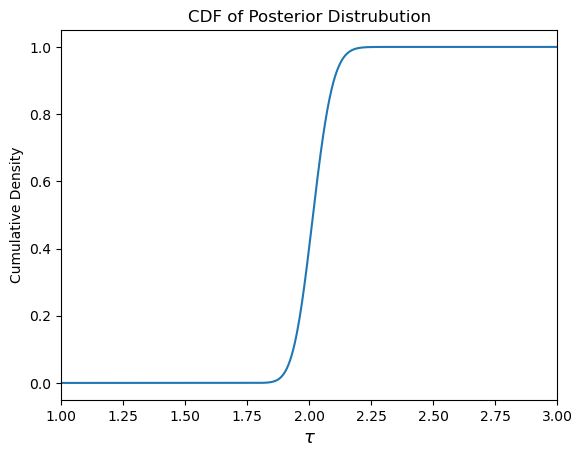

The most credible value for the posterior distribution is :2.015015015015015
The 68.27% HPD credible interval lies between:1.951951951951952 and 2.078078078078078


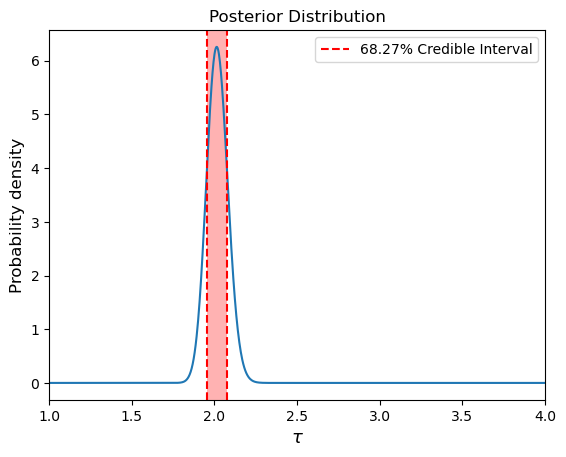

Some comments:
1. A highest posterior density [interval] is basically the shortest interval on a posterior density for some given confidence level. 
2. HPD is one of the methods for defining a credible interval in Bayesian statistics.
3. For low statistics prior distribution has a huge role to play, whereas for large statistics (like in this question of 1000 samples) the likelihood dominates the prior


In [229]:
def make_q1(noq1,n):  # wrapping up the code inside a fucntion
        if not noq1 :
            
            #importing all the libraries
            from scipy.stats import expon,uniform
            import numpy as np
            import matplotlib.pyplot as plt

            # defining prior distribution
            uni_i, uni_f = 0, 1                                       # the uniform distribution runs between 0 and 1
            uniform_xdata = np.linspace(-0., 1, 1000)                 # x data set for the distribution
            prior_dist = uniform.pdf(uniform_xdata, uni_i, uni_f)     # defining the prior pdf of an uniform distribution
            # plotting the uniform distribution 
            plt.plot(uniform_xdata, prior_dist)
            plt.title("Flat Prior(Uniform) Distribution")
            plt.xlabel(r"$\tau$")
            plt.ylabel("Probability density")
            plt.show()

            # defining likelihood distribution

            tau= 2.0 # time cnstant / scale

            def lnl (tau,tlist):                           # defining the log likelihood function , its important to use the log likelihood for large n values (1000) otherwise the normal likelihood breaks down as its too small
                m = len(tlist)
                return  -m*np.log(tau) -np.sum(tlist)/tau  # returning the log likelihood value

            tlist = expon.rvs(scale=tau,size=n)            # defining the exponential data set for the likelihood


            # generating the values of tau
            taulist = np.linspace(1,4,1000)                # generating the sample tau values

            #likeli_dist =lnl(taulist,tlist)-np.max(lnl(taulist,tlist))
            likeli_dist =lnl(taulist,tlist)-max(lnl(taulist,tlist))  # calling the likelihood function defined above

            #plotting the likelihood divided by its maximum as a function of tau
            plt.title("Likelihood Distribution")
            plt.xlabel(r'$ \tau  $',size=13)
            plt.ylabel(r'$\mathscr{L(\tau,t)} - max(\mathscr{L(\tau,t)})$',size=12) 
            plt.plot(taulist,np.exp(likeli_dist),label='n=1000')
            plt.show()

            # posterior distribution
            post_dist = np.exp(likeli_dist)*prior_dist                         # the posterior dist is just the product of the prior and the likelihood distribution
            norm_post_dist= (post_dist)/sp.integrate.trapz(post_dist, taulist) # normalizing the posterior dist


            # calculating the cdf of the posterior distribution so that we can find the credible intervals
            dt = taulist[2]-taulist[1]                # smallest division of the tau list values
            cdf_post = np.cumsum(norm_post_dist)*dt   # the cdf of the posterior

            # for finding the most credible value
            cred = np.argmin(abs(cdf_post-0.5))      # the index at 50% below the maximum point of the CDF will return the max credible value
            cred_val = taulist[cred]                 # finding the actual credible tau value by passing the index


            # to find the credible interval of 68.27% 

            cdf_int_i  = np.argmin(abs(cdf_post-0.84)) # finding the 84th percentile index value of the cdf
            cdf_int_f = np.argmin(abs(cdf_post-0.16))  # finding the 16th percentile index value of the cdf

            #plotting the CDF
            plt.plot(taulist,cdf_post)
            plt.xlim(1,3)
            plt.title("CDF of Posterior Distrubution")
            plt.ylabel("Cumulative Density")
            plt.xlabel(r"$\tau$",size=13)
            plt.show()

            cred_int_i= taulist[cdf_int_f]  # calculating the credible intervals by passing the index to the tau list , this is the lower limit
            cred_int_f=taulist[cdf_int_i]   # calculating the credible intervals by passing the index to the tau list , this is the upper limit

            #printing the credible value and the limits
            print("The most credible value for the posterior distribution is :"+str(cred_val))
            print("The 68.27% HPD credible interval lies between:"+str(cred_int_i)+" and "+str(cred_int_f))

            #plotting the posterior distribution with the credible intervals
            plt.plot(taulist,norm_post_dist)
            plt.title("Posterior Distribution")
            plt.xlabel(r"$\tau$",size=13)
            plt.ylabel("Probability density",size=12)
            plt.xlim(1,4)
            plt.axvline(cred_int_i,color='red',linestyle='--',label="68.27% Credible Interval")  #plotting the lower limit of the credible interval
            plt.axvline(cred_int_f,color='red',linestyle='--')                                   #plotting the lower limit of the credible interval
            plt.axvspan(cred_int_i, cred_int_f, color='r', alpha=0.3, lw=0)
            plt.legend()
            plt.show()

make_q1(noq1=False,n=1000)  #calling the function and passing the sample size of 1000 to generarte the iids

print("Some comments:")
print("1. A highest posterior density [interval] is basically the shortest interval on a posterior density for some given confidence level. ")
print("2. HPD is one of the methods for defining a credible interval in Bayesian statistics.")
print("3. For low statistics prior distribution has a huge role to play, whereas for large statistics (like in this question of 1000 samples) the likelihood dominates the prior")

Question 1.2 (/5)
===
Repeat for the Jeffreys prior.  Comment.

Answer :

<font size="3.5">
Jefferey's prior invokes the Fischer Information Matrix, in this case :
   
\begin{equation}
 \\  \pi(\tau) = \sqrt{I(\tau)}
\end{equation}
    
Where $\tau$ is the parameter we are interested in.
    
The Fischer Information Matrix for an exponential distribution is : 
\begin{equation}
 \\  I(\tau) = \frac{1}{\tau^2} 
\end{equation}
    
Hence, Jefferey's prior will be :
\begin{equation}
\\  \pi(\tau) = \frac{1}{\tau} 
\end{equation}

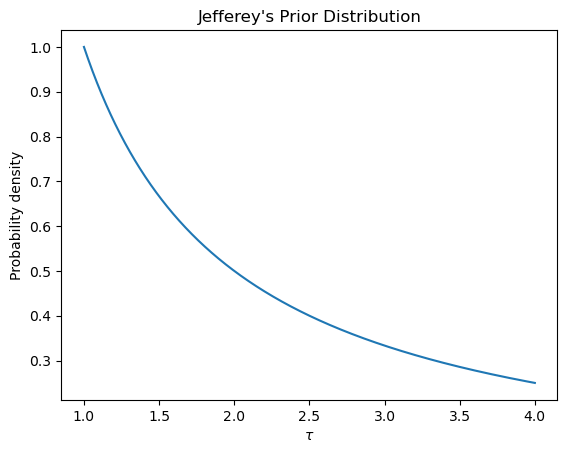

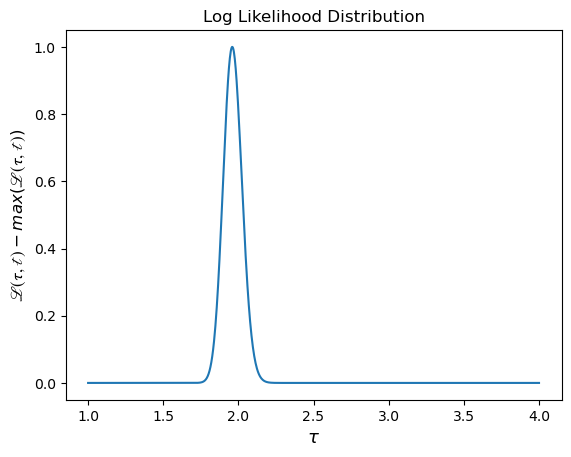

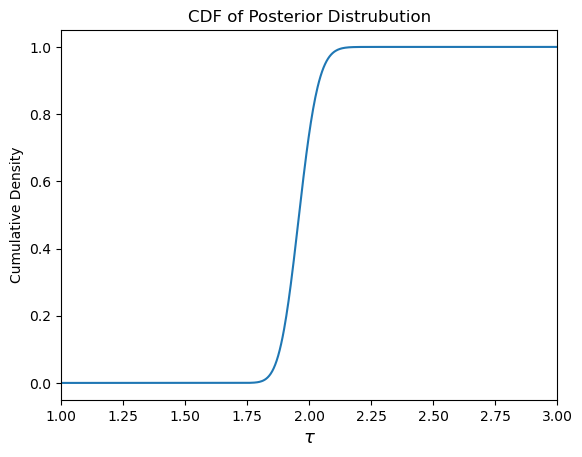

The most credible value for the posterior distribution is :1.9579579579579578
The 68.27% HPD credible interval lies between:1.8978978978978978 and 2.021021021021021


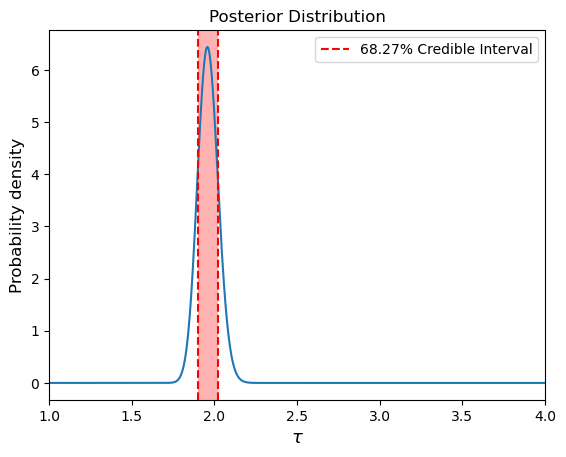

Some comments :
1. As we saw above Jefferey's prior invokes the Fischer Information matrix.
2. Jefferey's prior helps us to choose prior when we don't have any information about our parameter.
3. However as mentioned previously for high statistics case the choice of prior really doesnot matter much, it the likelihood that dominates, so we don't really see a huge difference using Jefferey's prior for 1000 iid samples.


In [231]:
def make_q2(noq2,n):                                       # wrapping up the code inside a fucntion
        if not noq2 :
            from scipy.stats import expon,uniform
            import numpy as np
            import matplotlib.pyplot as plt

            tau= 2.0 # time cnstant / scale
           
            # defining the likelihood function
            def lnl (tau,tlist):                           # defining the log likelihood function , its important to use the log likelihood for large n values (1000) otherwise the normal likelihood breaks down as its too small
                m = len(tlist)
                return  -m*np.log(tau) -np.sum(tlist)/tau  # returning the log likelihood value

            tlist = expon.rvs(scale=tau,size=n)            # defining the exponential iids for size n

            taulist = np.linspace(1,4,1000)                # generating the list of tau values
            
            # here we will use Jefferey's prior 
            jeff_prior = 1/taulist
            
            #plotting Jeffereys prior
            plt.plot(taulist,jeff_prior)
            plt.title("Jefferey's Prior Distribution")
            plt.xlabel(r"$\tau$")
            plt.ylabel("Probability density")
            plt.show()

            likeli_dist =lnl(taulist,tlist)-max(lnl(taulist,tlist))         # calling the log likelihood function to form the likelihood distribution

            #plotting the likelihood divided by its maximum as a function of tau
            plt.title("Log Likelihood Distribution")
            plt.xlabel(r'$ \tau  $',size=13)
            plt.ylabel(r'$\mathscr{L(\tau,t)} - max(\mathscr{L(\tau,t)})$',size=12)
            plt.plot(taulist,np.exp(likeli_dist),label='n=1000')
            plt.show()

            # forming the posterior distribution
            post_dist = np.exp(likeli_dist)*jeff_prior                       # the posterior dist is just the product of the prior and the likelihood distribution
            norm_post_dist= post_dist/sp.integrate.trapz(post_dist, taulist) # normalized posterior

            dt = taulist[2]-taulist[1]                           # definning the smallest interval between the tau values in taulist
            cdf_post = np.cumsum(norm_post_dist)*dt              # defining the cdf of the posterior distribution so that we can find the credible intervals and credible value

            # for finding the most credible value
            cred = np.argmin(abs(cdf_post-0.5))                  # the index at 50% below the maximum point of the CDF will return the max credible value
            cred_val = taulist[cred]                             # finidng the credible value bu passing the credible index from the CDF to the taulist


            # to find the credible interval of 68.27% 
            cdf_int_i  = np.argmin(abs(cdf_post-0.84))           # finding the 84th percentile index value of the cdf
            cdf_int_f = np.argmin(abs(cdf_post-0.16))            # finding the 16th percentile index value of the cdf

            #plotting the CDF
            plt.plot(taulist,cdf_post)
            plt.xlim(1,3)
            plt.title("CDF of Posterior Distrubution")
            plt.ylabel("Cumulative Density")
            plt.xlabel(r"$\tau$",size=13)
            plt.show()

            cred_int_i= taulist[cdf_int_f]                       # calculating the credible intervals by passing the index to the tau list , this is the upper limit
            cred_int_f=taulist[cdf_int_i]                        # calculating the credible intervals by passing the index to the tau list , this is the lower limit

            #printing the credible value for the posterior density and the credible intervals
            print("The most credible value for the posterior distribution is :"+str(cred_val))
            print("The 68.27% HPD credible interval lies between:"+str(cred_int_i)+" and "+str(cred_int_f))

            ##plotting the posterior distribution with the credible intervals
            plt.plot(taulist,norm_post_dist)
            plt.title("Posterior Distribution")
            plt.xlabel(r"$\tau$",size=13)
            plt.ylabel("Probability density",size=12)
            plt.xlim(1,4)
            plt.axvline(cred_int_i,color='red',linestyle='--',label="68.27% Credible Interval")  # plotting the lower limit of the credible interval
            plt.axvline(cred_int_f,color='red',linestyle='--')                                   # plotting the upper limit of the credible interval 
            plt.axvspan(cred_int_i, cred_int_f, color='r', alpha=0.3, lw=0)
            plt.legend() 
            plt.show()

make_q2(noq2=False,n=1000)  #calling the function and passing the 1000 sample points for the iids

print("Some comments :")
print("1. As we saw above Jefferey's prior invokes the Fischer Information matrix.")
print("2. Jefferey's prior helps us to choose prior when we don't have any information about our parameter.")
print("3. However as mentioned previously for high statistics case the choice of prior really doesnot matter much, it the likelihood that dominates, so we don't really see a huge difference using Jefferey's prior for 1000 iid samples.")

Question 1.3 (/10)
===
Repeat in the ML frequentist case, with the approximation of symmetric confidence intervals obtained from the Fisher information.  Comment.

<font size="3.5">

For Frequentist case,

The confidence interval ca be built from the MLE 

From the covariance Matrix we have :
\begin{equation}
 \\ C_{i,j}^{-1} = \partial_{\theta_i \theta_j}^2 ln \mathscr{L}
\end{equation}

And the standard deviation generally is :
\begin{equation}
 \\ \sigma_{\hat{\tau}}=\frac{\hat{\tau}}{\sqrt{n}}
\end{equation}

Generally for large enough samples $ \sqrt{n}(\hat{\theta_n} - \hat{\theta_o}) $ converges towards a normal distribution of mean $\mu$ amd std dev $\frac{1}{I(\theta)}$

Where $I(\theta)$ is the Fisher Information matrix

Hence, in this specific case where we are dealing with an exponential distribution we have,
\begin{equation}
 \\ var(\hat{\tau}) = \frac{\tau^2}{n}
\end{equation}

And standard deviation is therefore :

\begin{equation}
 \\ \sigma(\hat{\tau}) = \frac{\bar{t}}{\sqrt{n}}
\end{equation}

And finally the the MLE is :

\begin{equation}
   \\ \hat{\tau} = \frac{\sum{t}}{n}
   \\ or, \hat{\tau} = \bar{t}
\end{equation}
    
So the 68.27% confidence interval in the ML Frequentist case likes between : $ \hat{\tau} + 1 \sigma(\hat{\tau})$ and  $ \hat{\tau} -  1 \sigma(\hat{\tau})$

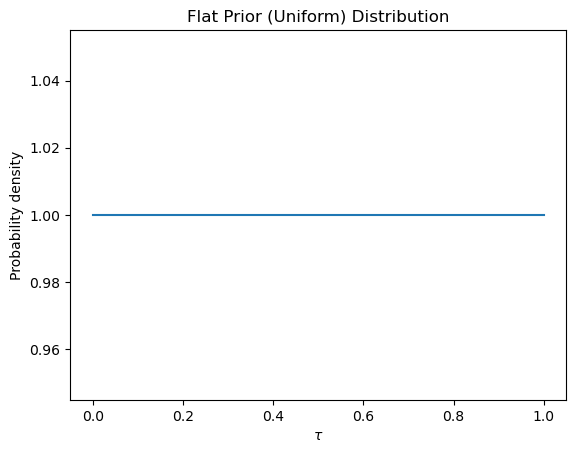

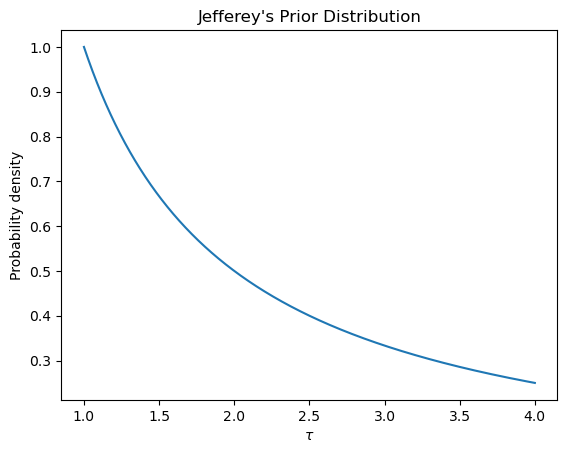

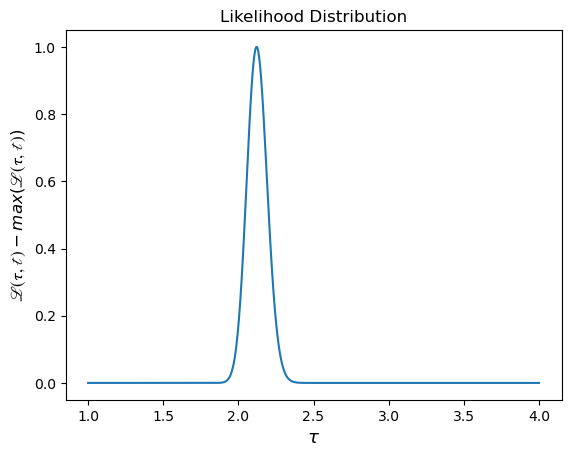

The 68.27% Confidence Interval for Jefferey's Prior lies between:2.0568745669167523 and 2.183365673323488


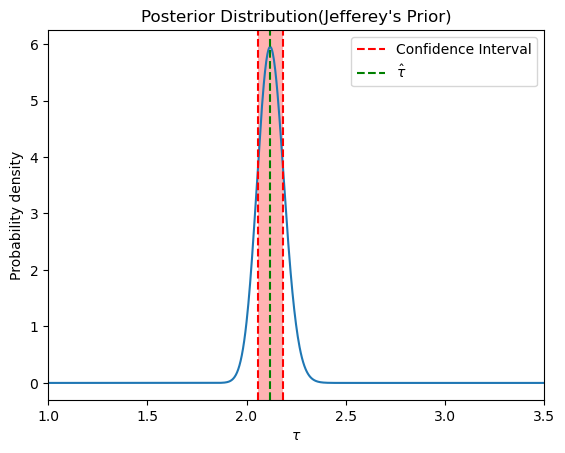

The 68.27% Confidence Interval for Flat prior lies between:2.0568745669167523 and 2.183365673323488


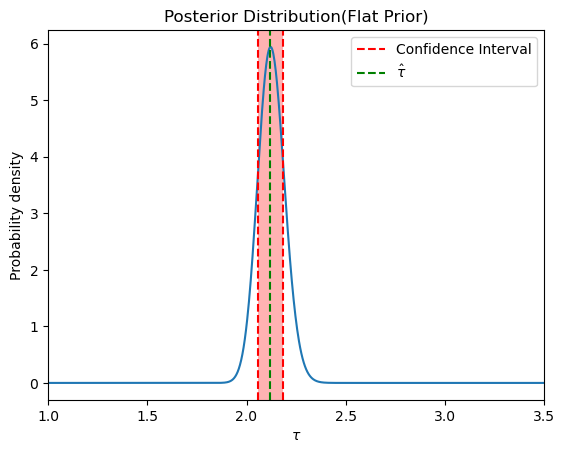

Some comments :
1. A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times.
2. Here overall again for high statistics case the choice of the prior really doesnot play a huge role on the posterior distribution.
3. We are trying to study the confidence intervals using the frequentist Maximum Likelihood approach, by calculating the expected parameter tauhat value first.
4. Typically the variance and standard deviation is then calculated and then we construct the confidence intervals typically by going up and down 1 standard deviation form the expected parameter which in this case is tauhat


In [234]:
def make_q3(noq3,n):                                                  # wrapping up as a function
        if not noq3 :
            #importing all the packages
            from scipy.stats import expon,uniform
            import numpy as np
            import matplotlib.pyplot as plt

            tau=2                                                    # the time constant of an exponential distribution / scale

            # defining prior distribution whcih is flat/ uniform
            uni_i, uni_f = 0, 1                                      # the uniform distribution runs between 0 and 1
            uniform_xdata = np.linspace(-0., 1, 1000)                # x data set

            prior_dist = uniform.pdf(uniform_xdata, uni_i, uni_f)    # forming the prior distribution passing the pdf of an uniform distribution
            plt.plot(uniform_xdata, prior_dist)
            plt.title("Flat Prior (Uniform) Distribution")
            plt.xlabel(r"$\tau$")
            plt.ylabel("Probability density")
            plt.show()

            # defining the likelihood distribution function 
            def lnl (tau,tlist):                                    # defining the log likelihood function , its important to use the log likelihood for large n values (1000) otherwise the normal likelihood breaks down as its too small
                m = len(tlist) 
                return  -m*np.log(tau) -np.sum(tlist)/tau           # returning the log of likelihood

            tlist = expon.rvs(scale=tau,size=n)                     # defining the iids from an exponential distribution
            
            # generating the values of tau
            taulist = np.linspace(1,4,1000)                         # array of tau values
            
            #prior distribution
            jeff_prior = 1/taulist                                  # defining the Jeffereys prior 

            #plotting the Jefferey's prior
            plt.plot(taulist,jeff_prior)
            plt.title("Jefferey's Prior Distribution")
            plt.xlabel(r"$\tau$")
            plt.ylabel("Probability density")
            plt.show()

            likeli_dist =lnl(taulist,tlist)-max(lnl(taulist,tlist))  # calling the likelihood function to get the likelihood distribution
            
            #plotting the likelihood divided by its maximum as a function of tau
            plt.title("Likelihood Distribution")
            plt.xlabel(r'$ \tau  $',size=13)
            plt.ylabel(r'$\mathscr{L(\tau,t)} - max(\mathscr{L(\tau,t)})$',size=12)
            plt.plot(taulist,np.exp(likeli_dist),label='n=1000')
            plt.show()

            # defining the variance and standard deviation of the MLE
            vartauhat = tau**2/n                                     # the variance of tauhat
            nsig, sig = 3.0 , np.sqrt(vartauhat)                     # calculating the standard deviation from the variance of tauhat

            # defining both the posterior distribution based on the two types of priors used.
            post_dist_jeff = np.exp(likeli_dist)*jeff_prior          # posterior distribution using Jeffereys prior
            post_dist_flat = np.exp(likeli_dist)*prior_dist          # posterior distribution using uniform distributed prior

            norm_post_dist_jeff= post_dist_jeff/sp.integrate.trapz(post_dist_jeff, taulist) # normalized posterior
            norm_post_dist_flat= post_dist_flat/sp.integrate.trapz(post_dist_flat, taulist) # normalized posterior
            
            tauhat_f = taulist[np.argmax(norm_post_dist_flat)]        # tauhat based on the flat prior
            tauhat_j = taulist[np.argmax(norm_post_dist_jeff)]        # tauhat based on the jeffereys prior

            # plotting the posterior distribution with Jefferey's prior
            print("The 68.27% Confidence Interval for Jefferey's Prior lies between:"+str(tauhat_j-sig)+" and "+str(tauhat_j+sig)) # printing the confidence intervals assuming a frequentist ML approximation of symmetry
            plt.plot(taulist,norm_post_dist_jeff)
            plt.axvline(tauhat_j+sig,ymin=0,ymax=7, color='red',linestyle='--',label="Confidence Interval")
            plt.axvline(tauhat_j, color='green',linestyle='--',label=r"$\hat{\tau}$")
            plt.axvline(tauhat_j-sig,ymin=0,ymax=7, color='red',linestyle='--')
            plt.axvspan(tauhat_j-sig, tauhat_j+sig, color='r', alpha=0.3, lw=0)
            plt.title("Posterior Distribution(Jefferey's Prior)")
            plt.xlabel(r"$\tau$")
            plt.ylabel("Probability density")
            plt.xlim(1,3.5)
            plt.legend()
            plt.show()

            # plotting the posterior distribution with Flat prior
            print("The 68.27% Confidence Interval for Flat prior lies between:"+str(tauhat_f-sig)+" and "+str(tauhat_f+sig)) # printing the confidence intervals assuming a frequentist ML approximation of symmetry
            plt.plot(taulist,norm_post_dist_flat)
            plt.axvline(tauhat_f+sig,ymin=0,ymax=7, color='red',linestyle='--',label="Confidence Interval")
            plt.axvline(tauhat_f-sig,ymin=0,ymax=7, color='red',linestyle='--')
            plt.axvline(tauhat_f, color='green',linestyle='--',label=r"$\hat{\tau}$")
            plt.axvspan(tauhat_f-sig, tauhat_f+sig, color='r', alpha=0.3, lw=0)
            plt.title("Posterior Distribution(Flat Prior)")
            plt.xlabel(r"$\tau$")
            plt.ylabel("Probability density")
            plt.xlim(1,3.5)
            plt.legend()
            plt.show()

make_q3(noq3=False,n=1000)  # calling the fucntion and passing the value of 1000 sample points

print("Some comments :")
print("1. A confidence interval, in statistics, refers to the probability that a population parameter will fall between a set of values for a certain proportion of times.")
print("2. Here overall again for high statistics case the choice of the prior really doesnot play a huge role on the posterior distribution.")
print("3. We are trying to study the confidence intervals using the frequentist Maximum Likelihood approach, by calculating the expected parameter tauhat value first.")
print("4. Typically the variance and standard deviation is then calculated and then we construct the confidence intervals typically by going up and down 1 standard deviation form the expected parameter which in this case is tauhat")

Question 1.4 (/10)
===
For all the previous questions, study the coverage of all the intervals, Bayesian and frequentist.  Comment.

var(tauhat)= 0.004 	Coverage from flat prior (Frequentist)= 0.6961


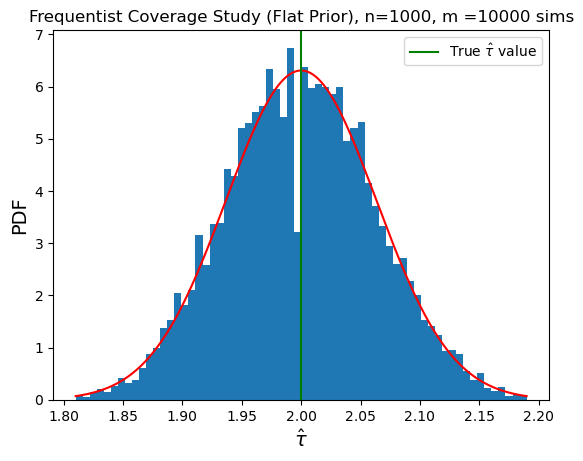

var(tauhat)= 0.004 	Coverage from Jeffereys prior (Frequentist)= 0.6937


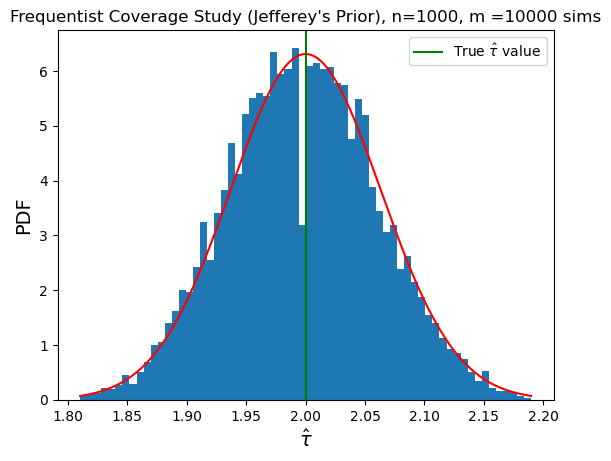

Coverage from flat prior (Bayesian)= 0.6787


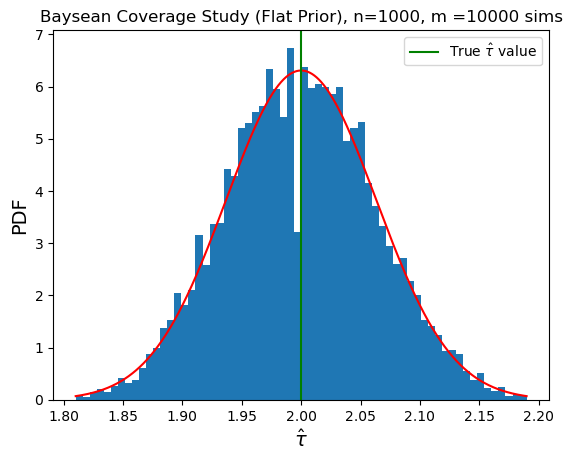

Coverage from Jeffereys prior (Bayesian)= 0.6787


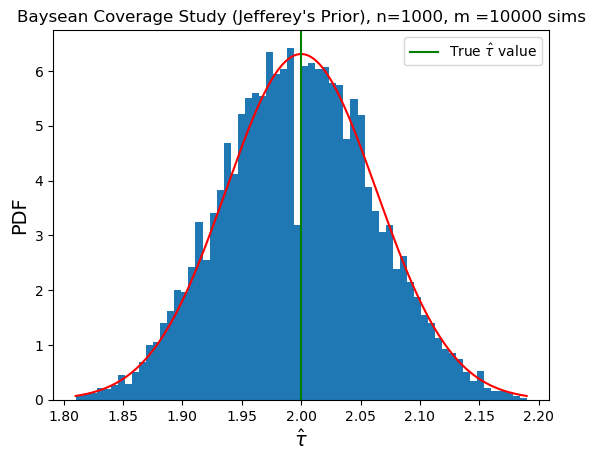

Some comments :
1. The basic concept of behind coverage study is to see what fraction of times we have a certain value for many experiments.
2. Coverage depends on prior, it is not a Baysean feature.
3. Usually coberage doesnot apply to Bayesian credible intervals as we see it doesnot really make any difference.
4. Overall as statistics increases everything conveges.


In [240]:
def make_q4(noq4,n):                                      # wrapping up into a function
        if not noq4 :
            # importing all the libraries
            from scipy.stats import expon,norm
            import matplotlib.pyplot as plt
            import numpy as np

            m=10000                                       # no of simulation
            tau= 2                                        # the time constant of the exponential distribution / scale

            tauhat=[]                                     # declaring an empty list to store all the tauhats generated from the flat prior distribution
            tauhatjeff=[]                                 # declaring an empty list to store all the tauhats generated from the Jeffereys prior distribution

            for i in range(m):                            # repeat the sim for m times
                # prior distribution
                uni_i, uni_f = 0, 1                       # the uniform distribution runs between 0 and 1
                uniform_xdata = np.linspace(-0., 1, 1000) # x data set

                #defing the flat prior distribution
                prior_dist = uniform.pdf(uniform_xdata, uni_i, uni_f)  

                tau= 2.0 # time cnstant / scale
                
                #defining the log likelihood distribution
                def lnl (tau,tlist):
                    m = len(tlist)
                    return  -m*np.log(tau) -np.sum(tlist)/tau

                tlist = expon.rvs(scale=tau,size=n)       # list of the exponetial iids with sample size of n       


                # generating the values of tau
                taulist = np.linspace(1,4,1000)           # list of all the tau values
                
                #prior distribution
                jeff_prior = 1/taulist                    # defining the Jeffereys prior

                # calling the likelihood function to form the likelihood distribution
                likeli_dist =lnl(taulist,tlist)-max(lnl(taulist,tlist))

                # posterior distribution
                post_dist = np.exp(likeli_dist)*prior_dist                                        # posterior distribution with flat prior
                norm_post_dist= (post_dist)/sp.integrate.trapz(post_dist, taulist)                # normalized posterior

                post_dist_jeff = np.exp(likeli_dist)*jeff_prior                                   # posterior distribution with Jeffereys prior
                norm_post_dist_jeff= (post_dist_jeff)/sp.integrate.trapz(post_dist_jeff, taulist) # normalized posterior

                tauhats = taulist[np.argmax(norm_post_dist)]                                      # calcuating all the tauhats by taking the max value of the posterior distibution
                tauhat.append(tauhats)                                                            # storing all the tauhats to study their coverage

                tauhatsjeff = taulist[np.argmax(norm_post_dist_jeff)]                             # calcuating all the tauhats by taking the max value of the posterior with Jeffereys prior distibution
                tauhatjeff.append(tauhatsjeff)                                                    # storing all the tauhats to study their coverage


            vartauhat = tau**2/n                                           # calulating the variance of the tauhat for the frequentist case
            nsig, sig = 3.0 , np.sqrt(vartauhat)                           # calculating the standard deviation of the tauhats for the frequentist case


            # Confidence Interval flat prior case
            confint = [[tt-sig, tt+sig] for tt in tauhat]                  # we check if the true val is in the interval or not for coverage
            cove = [ci[0] <= tau <= ci[-1] for ci in confint]              # checking to see tau lies within the intervals
            cov = np.sum(cove)/m                                           # summing up to study the final coverage


            # Confidence Interval jefferey's prior case (Frequentist Case)
            confint_jeff = [[ttj-sig, ttj+sig] for ttj in tauhatjeff]      # we check if the true val is in the interval or not for coverage for Jeffereys prior case
            covejeff = [cij[0] <= tau <= cij[-1] for cij in confint_jeff]  # checking to see tau lies within the intervals for Jeffereys prior case
            covjeff = np.sum(covejeff)/m                                   # summing up to study the final coverage for Jeffereys prior case

            # calculating the credible Interval flat prior case using the CDF
            dt = taulist[2]-taulist[1]                                     # the smallest intervals between the tau values 
            cdf_flat = np.cumsum(tauhat)*dt                                # cdf of the posterior for the flat prior case
            cred_flat = np.argmin(abs(cdf_flat-0.5))                       # the index at 50% below the maximum point of the CDF will return the max credible value
            cred_val_flat = taulist[cred_flat]                             # passing the index from the CDF to calculate the cred val

            cdf_int_i_flat  = np.argmin(abs(cdf_flat-0.84))                # finding the 84th percentile index value of the cdf
            cdf_int_f_flat = np.argmin(abs(cdf_flat-0.16))                 # finding the 16th percentile index value of the cdf

            cred_int_i_flat= taulist[cdf_int_f_flat]                       # calculating the credible intervals by passing the index to the tau list , this is the lower limit
            cred_int_f_flat=taulist[cdf_int_i_flat]                        # calculating the credible intervals by passing the index to the tau list , this is the upper limit

            cov_b_f = 2*np.sum(cred_int_f_flat-cred_int_i_flat)            # calculating the coverage for the bayesean case with the flat prior

            #Credible Interval Jefferey's prior case
            dt = taulist[2]-taulist[1]                                     # the smallest intervals between the tau values 
            cdf_jeff = np.cumsum(tauhatjeff)*dt                            # cdf of the posterior for the flat prior case
            cred_jeff = np.argmin(abs(cdf_jeff-0.5))                       # the index at 50% below the maximum point of the CDF will return the max credible value
            cred_val_jeff = taulist[cred_jeff]                             # passing the index from the CDF to calculate the cred val
 
            cdf_int_i_jeff  = np.argmin(abs(cdf_jeff-0.84))                # finding the 84th percentile index value of the cdf
            cdf_int_f_jeff = np.argmin(abs(cdf_jeff-0.16))                 # finding the 16th percentile index value of the cdf

            cred_int_i_jeff= taulist[cdf_int_f_jeff]                       # calculating the credible intervals by passing the index to the tau list , this is the lower limit
            cred_int_f_jeff=taulist[cdf_int_i_jeff]                        # calculating the credible intervals by passing the index to the tau list , this is the upper limit

            cov_b_j = 2*np.sum(cred_int_f_jeff-cred_int_i_jeff)            # calculating the coverage for the bayesean case with the Jeffereys prior


            # making the bin edges and the x data for plotting
            binedges = np.linspace(tau-nsig*sig, tau+nsig*sig,65)          # bin edges run between 3 sigmas around the tau value for 65 bins in total
            xrange = np.linspace(binedges[0],binedges[-1],1000)            # xrange is defined for the PDF which runs between the first and last bin edge values

            # plotting the Frequentist Coverage Study (Flat Prior)
            print('var(tauhat)=',vartauhat,'\tCoverage from flat prior (Frequentist)=',cov)
            plt.plot(xrange,norm.pdf(xrange, scale= np.sqrt(vartauhat),loc=tau),'r-')
            plt.title("Frequentist Coverage Study (Flat Prior), n=" +str(n)+", m ="+str(m)+" sims")
            plt.hist(tauhat,bins=binedges,density=True)
            plt.xlabel(r"$\hat{\tau}$",size=14)
            plt.ylabel("PDF",size=14)
            plt.axvline(tau,color='green',label=r"True $\hat{\tau}$ value")
            plt.legend()
            plt.show()

            # plotting the Frequentist Coverage Study (Jefferey's Prior)
            print('var(tauhat)=',vartauhat,'\tCoverage from Jeffereys prior (Frequentist)=',covjeff)
            plt.plot(xrange,norm.pdf(xrange, scale= np.sqrt(vartauhat),loc=tau),'r-')
            plt.title("Frequentist Coverage Study (Jefferey's Prior), n=" +str(n)+", m ="+str(m)+" sims")
            plt.hist(tauhatjeff,bins=binedges,density=True)
            plt.xlabel(r"$\hat{\tau}$",size=14)
            plt.ylabel("PDF",size=14)
            plt.axvline(tau,color='green',label=r"True $\hat{\tau}$ value")
            plt.legend()
            plt.show()

            # plotting the Baysean Coverage Study (Flat Prior)
            print('Coverage from flat prior (Bayesian)=',np.round(cov_b_f,4))
            plt.plot(xrange,norm.pdf(xrange, scale= np.sqrt(vartauhat),loc=tau),'r-')
            plt.title("Baysean Coverage Study (Flat Prior), n=" +str(n)+", m ="+str(m)+" sims")
            plt.hist(tauhat,bins=binedges,density=True)
            plt.xlabel(r"$\hat{\tau}$",size=14)
            plt.ylabel("PDF",size=14)
            plt.axvline(tau,color='green',label=r"True $\hat{\tau}$ value")
            plt.legend()
            plt.show()

            #plotting the Baysean Coverage Study (Jefferey's Prior)
            print('Coverage from Jeffereys prior (Bayesian)=',np.round(cov_b_j,4))
            plt.plot(xrange,norm.pdf(xrange, scale= np.sqrt(vartauhat),loc=tau),'r-')
            plt.title("Baysean Coverage Study (Jefferey's Prior), n=" +str(n)+", m ="+str(m)+" sims")
            plt.hist(tauhatjeff,bins=binedges,density=True)
            plt.xlabel(r"$\hat{\tau}$",size=14)
            plt.ylabel("PDF",size=14)
            plt.axvline(tau,color='green',label=r"True $\hat{\tau}$ value")
            plt.legend()
            plt.show()

make_q4(noq4=False,n=1000) # calling the function to make all the plots and passing the value for 1000 sample iids

print("Some comments :")
print("1. The basic concept of behind coverage study is to see what fraction of times we have a certain value for many experiments.")
print("2. Coverage depends on prior, it is not a Baysean feature.")
print("3. Usually coberage doesnot apply to Bayesian credible intervals as we see it doesnot really make any difference.")
print("4. Overall as statistics increases everything conveges.")

Question 1.5 (/5)
===
Repeat all of the previous questions for $n=3$.  Comment.

-----------------------------Quenstion 1 : ------------------------------------------------------


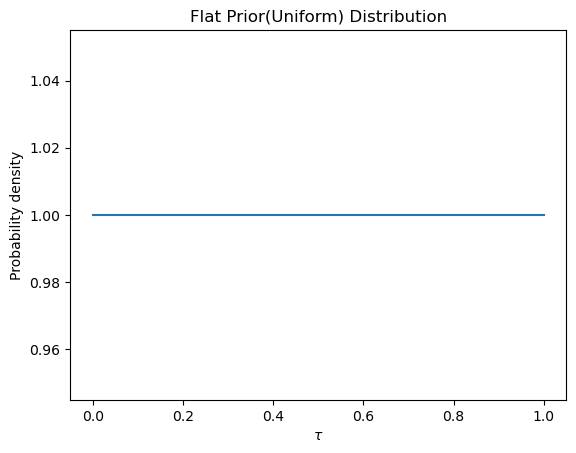

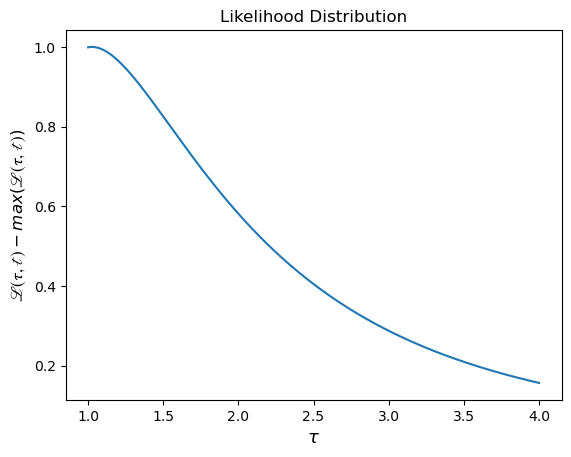

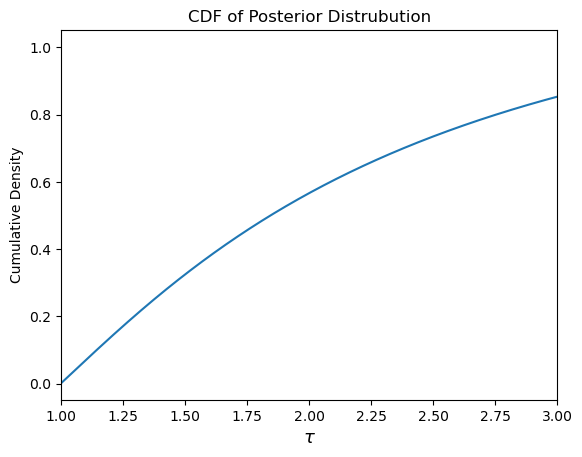

The most credible value for the posterior distribution is :1.8438438438438438
The 68.27% HPD credible interval lies between:1.2312312312312312 and 2.933933933933934


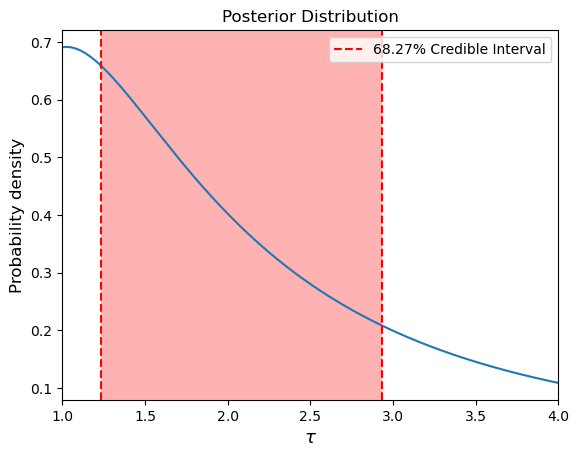

---------------------------- Quenstion 2 : ------------------------------------------------------


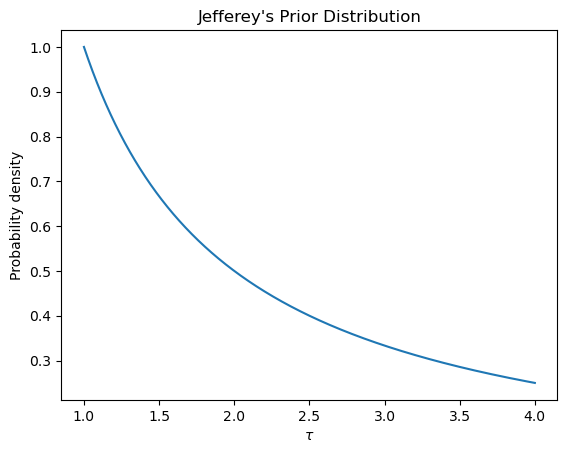

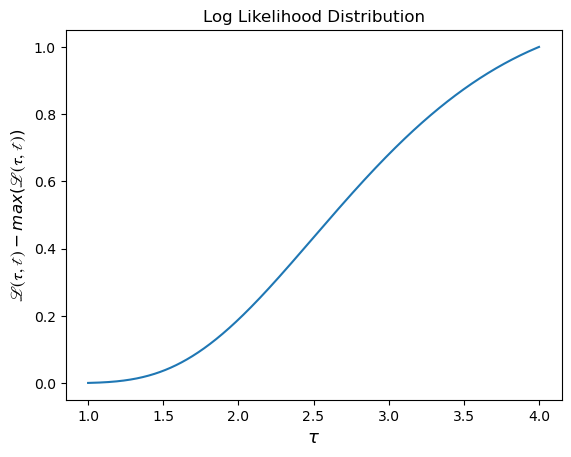

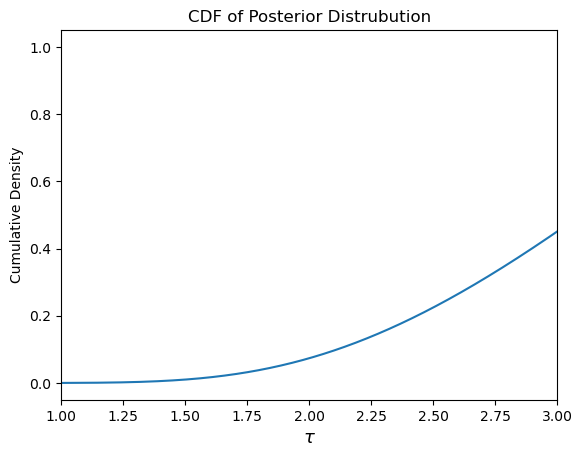

The most credible value for the posterior distribution is :3.093093093093093
The 68.27% HPD credible interval lies between:2.318318318318318 and 3.714714714714715


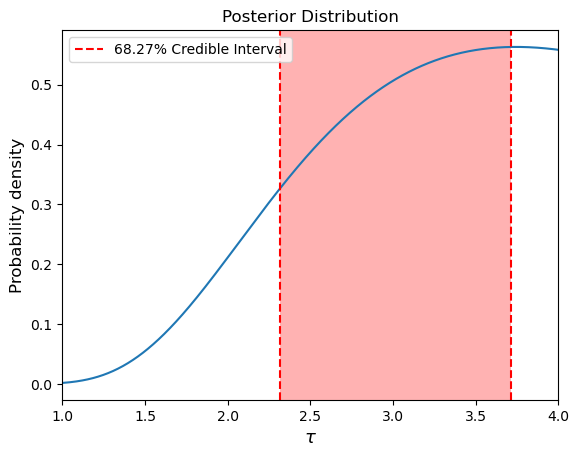

-----------------------------Quenstion 3 : ------------------------------------------------------


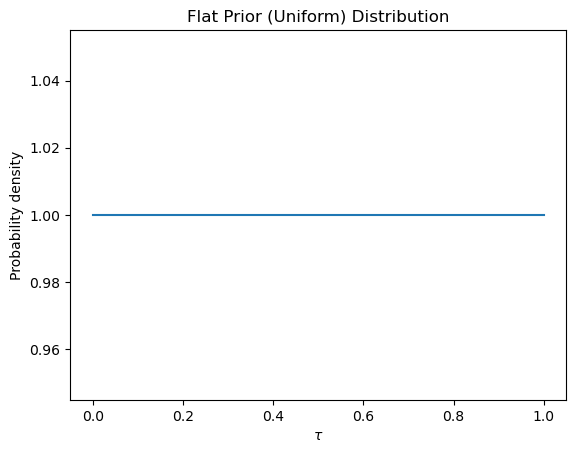

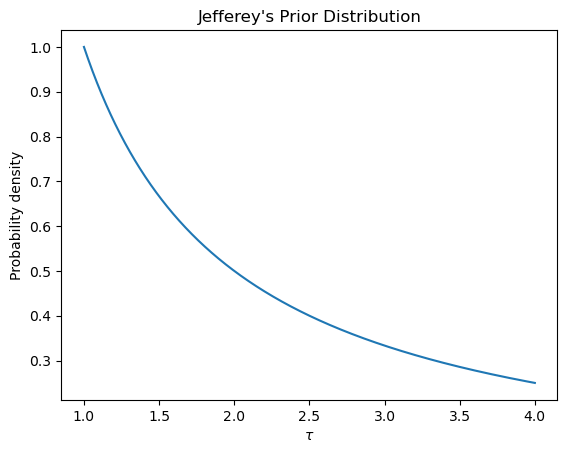

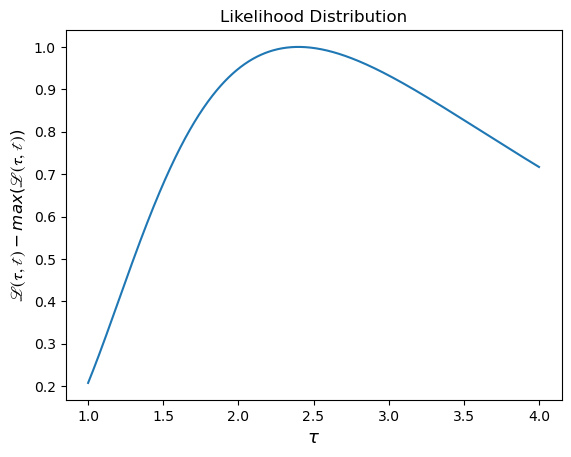

The 68.27% Confidence Interval for Jefferey's Prior lies between:0.6440982604195473 and 2.9534993371780502


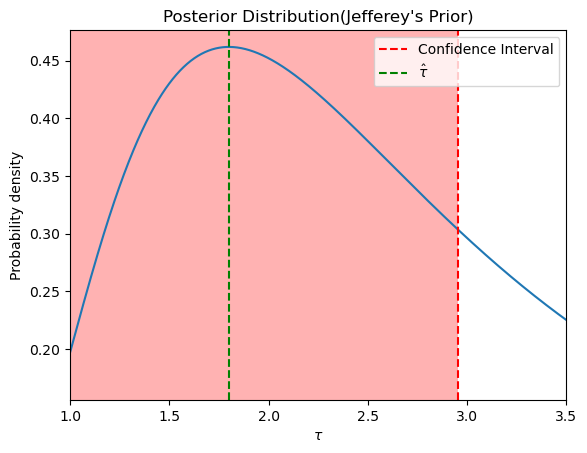

The 68.27% Confidence Interval for Flat prior lies between:1.2446988610201482 and 3.554099937778651


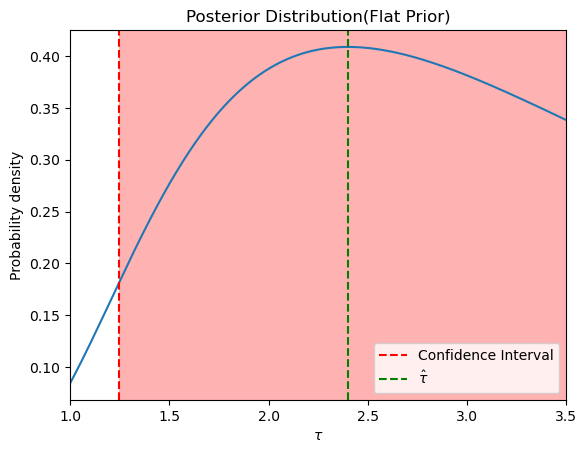

-----------------------------Quenstion 4: -------------------------------------------------------
var(tauhat)= 1.3333333333333333 	Coverage from flat prior (Frequentist)= 0.8479


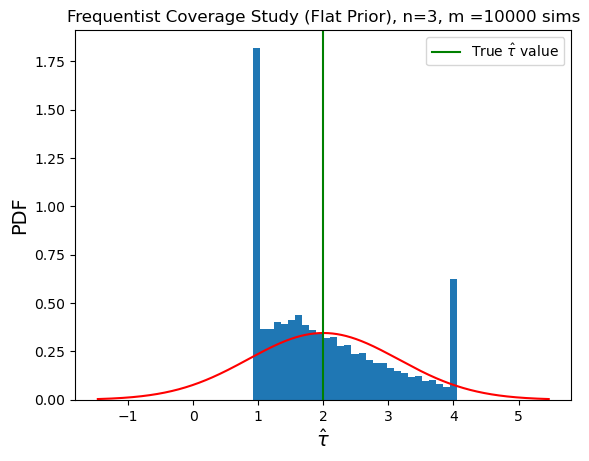

var(tauhat)= 1.3333333333333333 	Coverage from Jeffereys prior (Frequentist)= 0.951


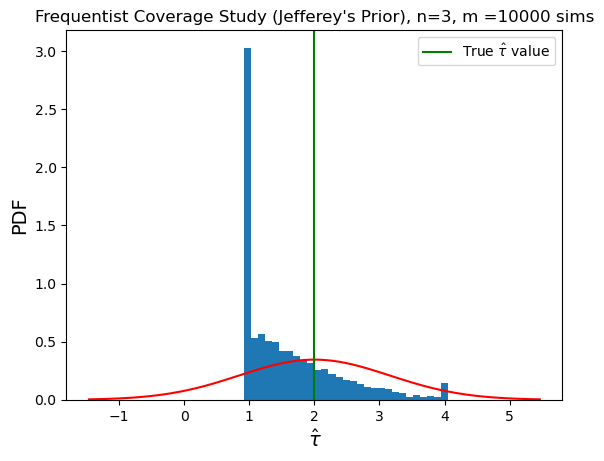

Coverage from flat prior (Bayesian)= 0.7027


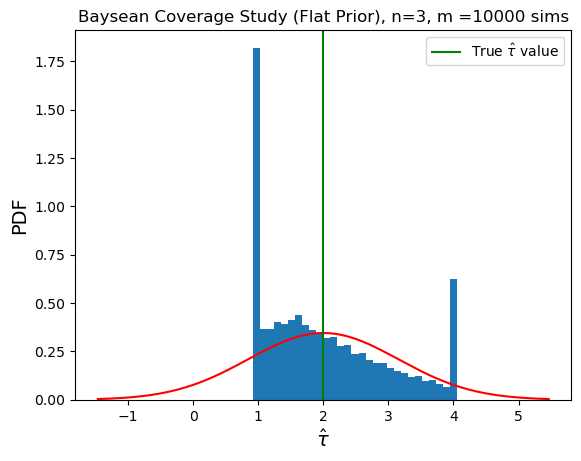

Coverage from Jeffereys prior (Bayesian)= 0.8709


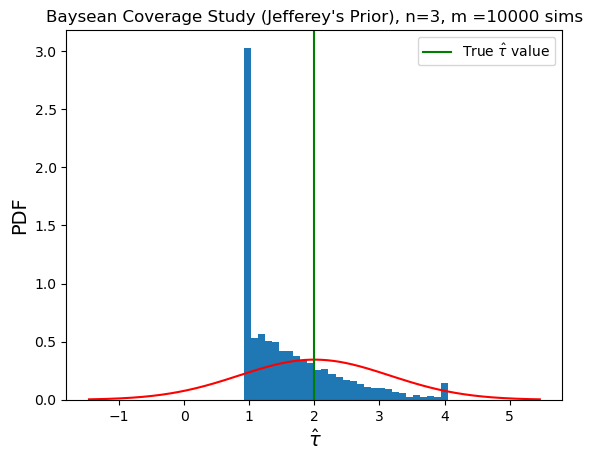

1. Here for a low statistics case we can see that the prior distribution has more influcence than the likelihood distribution.
2. Hence, the choice of a proper prior is very important. Its better to work with Jefferey's Prior rather than an uniform flat prior as Jefferey's prior helps us to choose prior when we don't have any information about our parameter.
3. Also for the low stats case we see that both the confidence and credible intervals gets widened and thrown off at times
4. The coverage for the frequentist case increases significantly from the typical 68% for low stats case, as now the confidence intervals get further apart
5. We can also see that for low stats case the distribution of the estimators are no longer Guassian. They get skewed as expected.
6. Overall for high stats case we invoke the Central Limit Theorem which gives us a more accurate coverage which cannot happen with low stats (n=3)


In [241]:
# This program calls all the previous questions and passes the n=3 as a small sample size to see how that effects our distribution
print("-----------------------------Quenstion 1 : ------------------------------------------------------")
make_q1(noq1=False,n=3)  # calling the 1st question
print("---------------------------- Quenstion 2 : ------------------------------------------------------")
make_q2(noq2=False,n=3)  # calling the 2nd question
print("-----------------------------Quenstion 3 : ------------------------------------------------------")
make_q3(noq3=False,n=3)  # calling the 3rd question
print("-----------------------------Quenstion 4: -------------------------------------------------------")
make_q4(noq4=False,n=3)  # calling the 4th question

print("1. Here for a low statistics case we can see that the prior distribution has more influcence than the likelihood distribution.")
print("2. Hence, the choice of a proper prior is very important. Its better to work with Jefferey's Prior rather than an uniform flat prior as Jefferey's prior helps us to choose prior when we don't have any information about our parameter.")
print("3. Also for the low stats case we see that both the confidence and credible intervals gets widened and thrown off at times")
print("4. The coverage for the frequentist case increases significantly from the typical 68% for low stats case, as now the confidence intervals get further apart")
print("5. We can also see that for low stats case the distribution of the estimators are no longer Guassian. They get skewed as expected.")
print("6. Overall for high stats case we invoke the Central Limit Theorem which gives us a more accurate coverage which cannot happen with low stats (n=3)")

Question 2 (/10)
===
Consider a coin flip, where the expectation of fair is $\varepsilon$.  Write the PMF $P(k; \varepsilon)$.  Then consider $n$ flips of the coin as $n$ single flips, determine the ML estimator for $\varepsilon$, and discuss consistency, bias and efficiency.

Answer : 

<font size="3.5">

Let $ X_1,X_2,...,X_N ϵ R $ be the n samples obtained from a Binomial Distribution from flipping a coin.

Binomial Distribution is used to model $'K'$ successes in $'n'$ trials with $ \epsilon $ expectation/efficiency 
$  \\ $ where, 
\begin{equation}    
K= k_1 + k_2 + k_3 + ..... k_n 
\end{equation}
    
Its P.D.F. / PMF is given by:
\begin{equation} 
f(K=k; n; \epsilon) = \frac{n!}{k!(n-k)!} \epsilon^{^{k}} (1-\epsilon)^{n-k}
\end{equation} 
    
$  \\ $ For $n$ single flips of the coin we have the Likelihood function $ \mathcal{L}$ for $\epsilon $ as  $ \mathcal{L}(\epsilon) $: 
\begin{equation} 
\mathcal{L}(\epsilon) = \prod_{i=1}^{n} f(k_{i}; n) 
\end{equation} 

\begin{equation} 
\mathcal{L}(\epsilon) = \prod_{i=1}^{N} \frac{n!}{k_{i}!(n-k_i)!} \epsilon^{k_{i}} (1-\epsilon)^{n-k_{i}}
\end{equation} 

$  \\ $ Now in order to simplify the calculation we take the log of the likelihood function :
\begin{equation} 
ln\mathcal{L}(\epsilon) = \sum_{i=1}^{N} ln (n!) - \sum_{i=1}^{N} ln (k_{i}!) - \sum_{i=1}^{N} ln(n-k_{i}!) + \sum_{i=1}^{N} k_i.ln(\epsilon) + (n- \sum_{i=1}^{N} k_i) . ln(1-\epsilon)
\end{equation} 
$  \\ $ In order to maximize the likelihood we set its derivative with respect to the parameter of interest (in our case $\epsilon$) to zero:
\begin{equation} 
\frac{\partial{}}{\partial{\epsilon}} ln\mathcal{L}(\epsilon) = \frac{1}{\epsilon}. \sum_{i=1}^{N} k_i - \frac{1}{1-\epsilon} \sum_{i=1}^{N} (n - k_i) = 0 
\end{equation} 
$ \\ $ which implies,
\begin{equation} 
\frac{1}{\epsilon}. \sum_{i=1}^{N} k_i = (\frac{1}{1-\epsilon})( N.n - \sum_{i=1}^{N} k_i) 
\end{equation}     
$ \\ $ Finally we have the estimator for our Maximized Likelihood function in terms of $\epsilon$ :
    
    
\begin{equation} 
\hat{\epsilon} = \frac{1}{N} (\frac{\sum_{i=1}^{N}k_{i}}{n}) = \frac{1}{N} (\frac{k_1}{n} + \frac{k_2}{n} + ... + \frac{k_N}{n})
\end{equation} 

$ \\ $ This is intuitively correct too, as this is the average of the ratio $ \frac{k_{i}}{n} $ for each $k_i$, which is intuitively average of $\epsilon$ for each $k_i$
    
$ \\ $ Now we check for the following properties of the estimator $ \hat{\epsilon} $ :
1. Consistency
2. Bias
3. Efficiency
    
$ \\ $ 1. Consistency : $\lim_{n\to\infty} \hat{\epsilon}$
\begin{equation} 
\lim_{n\to\infty} \frac{1}{N}\sum_{i=1}^{N}\frac{k_i}{n} = \frac{1}{nN}\sum_{i=1}^{N} k_i = \frac{nK}{nN} = \frac{K}{N} = \epsilon
\end{equation} 
$ \\ $ Hence our estimator $\hat{\epsilon}$ is consistent
    
$ \\ $ 2. Bias : $ b(\hat{\epsilon}) = E(\hat{\epsilon}) - \epsilon $
\begin{equation} 
E(\frac{1}{N}\sum_{i=1}^{N}\frac{k_i}{n}) - \epsilon =  \frac{1}{N}\sum_{i=1}^{N}E(\frac{k_i}{n}) -\epsilon = \frac{N\epsilon}{N} - \epsilon = 0
\end{equation}     
$ \\ $ Our estimator $\hat{\epsilon}$ is unbiased 
    
$ \\ $ 3. Efficiency : $ var(\hat{\epsilon}) $
\begin{equation}     
var(\sum_{i=1}^{N}E(\frac{k_i}{n}) = \frac{1}{n^2}\sum_{i=1}^{N} var(k_i) = \frac{1}{n^2}\sum_{i=1}^{N} \epsilon(1-\epsilon)= \frac{\epsilon(1-\epsilon)}{n}
\end{equation}     
$ \\ $ So variance of the estimator $\hat{\epsilon}$ gets smaller for large n, and also it is smaller for $\epsilon$ close to 0 or 1. In terms of $\epsilon$ it is maximized when $\epsilon=0.5$.
    
$ \\ $ To check for the Cramer-Rao Lower Bound 
\begin{equation}     
V_{CR}(\hat{\epsilon}) = \frac{1}{I(\epsilon)}  
\end{equation} 
(Since, the bias of the estimator is 0)
    
$ \\ $ Where $ I(\epsilon)= -E((\partial_{\epsilon})^2 ln\mathcal{L}) $ is the Fischer Information Matrix
\begin{equation} 
I(\epsilon)= -E((\partial_{\epsilon})^2 ln\mathcal{L})= -E(\frac{-1}{\epsilon^2}\sum_{i=1}^{N} - \frac{1-\epsilon}{(1-\epsilon)^2}\sum_{i=1}^{N}(n-k_i))
\\ I(\epsilon)= \frac{n}{\epsilon(1-\epsilon)} 
\end{equation}
    
$ \\ $ So, finally the $V_{CR}$ is : 
\begin{equation}   
V_{CR}(\hat{\epsilon})= \frac{\epsilon(1-\epsilon)}{n}
\end{equation}    

$ \\ $ Therefore the efficiency of the estimator :
    
\begin{equation}       
Eff(\hat{\epsilon}) = \frac{V_{CR}(\hat{\epsilon})}{V(\hat{\epsilon})}=1
\end{equation}       
    
$\\ $ Hence, our estimator $\hat{\epsilon}$ is a maximally effficient estimator.
</font>